<a href="https://colab.research.google.com/github/lorenzo1285/Analisis_Fianaciero/blob/main/Cash_convertion_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación e Importación de paqueterias 

In [ ]:
pip install FinRatioAnalysis

In [ ]:
pip install yahoo-fin

In [ ]:
pip install FinQuant

In [ ]:
import pandas as pd
import numpy as np
from FinRatioAnalysis import FinRatioAnalysis
import seaborn as sns
import matplotlib.pylab as plt
import os
from finquant.portfolio import build_portfolio
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
ra = FinRatioAnalysis('IBM')

# Valuacion de Acciones

In [ ]:
d_1 =  {'Name':[ 'IBM'],
      
      'Allocation':[100]
        }
df_1 = pd.DataFrame(data=d_1)
df_1.head()

,Name,Allocation
0,IBM,100


In [ ]:
from finquant.portfolio import build_portfolio
names = df_1['Name'].to_list()
start_date = '2021-03-25'
end_date = '2022-03-24'
pf = build_portfolio(names= names,
                     pf_allocation=df_1,
                     start_date= start_date,
                     end_date=end_date,
                     data_api="yfinance")

[*********************100%***********************]  1 of 1 completed


In [ ]:
pf.properties()

----------------------------------------------------------------------
Stocks: IBM
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.078
Portfolio Volatility: 0.208
Portfolio Sharpe Ratio: 0.352

Skewness:
        IBM
0 -0.629705

Kurtosis:
        IBM
0 -0.480558

Information:
  Name  Allocation
0  IBM       100.0
----------------------------------------------------------------------


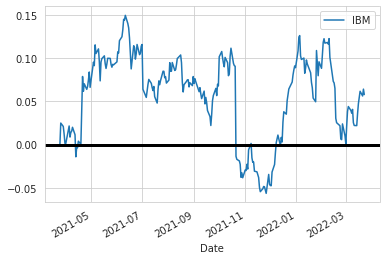

In [ ]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)
plt.rcParams["figure.figsize"] = (12, 12)
plt.show()

In [ ]:
pf.comp_mean_returns(freq=252)

IBM    0.07832
dtype: float64

# Analisis DuPont

In [ ]:
ra.Return_Ratios()

,Return_Equity,Return_Assets,Return_CapitalEmploy
endDate,,,
2021-12-31,0.303846,0.043507,0.058669
2020-12-31,0.271399,0.03584,0.048199
2019-12-31,0.452521,0.06197,0.065851
2018-12-31,0.519648,0.07074,0.155223


# Ciclo de Conversión de Efectivo 

In [ ]:
def CCC(ticker=''):

  #Cash Convertion Cycle
  
  ra = FinRatioAnalysis(ticker)

  avg_inventory = np.divide(ra.BalanceSheet.loc['inventory'].iloc[0] + 
                            ra.BalanceSheet.loc['inventory'].iloc[1],2)
  
  avg_netReceivables = np.divide(ra.BalanceSheet.loc['netReceivables'].iloc[0] + 
                                 ra.BalanceSheet.loc['netReceivables'].iloc[1],2)

  avg_accountsPayable = np.divide(ra.BalanceSheet.loc['accountsPayable'].iloc[0] + 
                                  ra.BalanceSheet.loc['accountsPayable'].iloc[1],2)
  

  costOfRevenue_day = np.divide(ra.IncomeSatement.loc['costOfRevenue'].iloc[0],360)
  
  totalRevenue_day = np.divide(ra.IncomeSatement.loc['totalRevenue'].iloc[0],360)

  DIO = np.divide(avg_inventory, costOfRevenue_day).round(5)
  #Days of inventory outstanding DIO
  
  DSO = np.divide(avg_netReceivables, totalRevenue_day).round(5)
  #Days of sales outstanding DSO
  
  DPO = np.divide(avg_accountsPayable, costOfRevenue_day).round(5)
  # Days payable outstanding DPO
  
  CCC = DIO + DSO - DPO
  # Cash Convertion Cycle
  return pd.DataFrame(data=[DIO, DSO, DPO, CCC], columns=['Ultimo Periodo'], 
                      index=['DIO', 'DSO', 'DPO', 'CCC'])

In [ ]:
df = CCC('IBM')

In [ ]:
def CCC_Anterior(ticker=''):

  #Cash Convertion Cycle
  
  ra = FinRatioAnalysis(ticker)

  avg_inventory = np.divide(ra.BalanceSheet.loc['inventory'].iloc[1] + 
                            ra.BalanceSheet.loc['inventory'].iloc[2],2)
  
  avg_netReceivables = np.divide(ra.BalanceSheet.loc['netReceivables'].iloc[1] + 
                                 ra.BalanceSheet.loc['netReceivables'].iloc[2],2)

  avg_accountsPayable = np.divide(ra.BalanceSheet.loc['accountsPayable'].iloc[0] + 
                                  ra.BalanceSheet.loc['accountsPayable'].iloc[1],2)
  

  costOfRevenue_day = np.divide(ra.IncomeSatement.loc['costOfRevenue'].iloc[1],360)
  
  totalRevenue_day = np.divide(ra.IncomeSatement.loc['totalRevenue'].iloc[1],360)

  DIO = np.divide(avg_inventory, costOfRevenue_day).round(5)
  #Days of inventory outstanding DIO
  
  DSO = np.divide(avg_netReceivables, totalRevenue_day).round(5)
  #Days of sales outstanding DSO
  
  DPO = np.divide(avg_accountsPayable, costOfRevenue_day).round(5)
  # Days payable outstanding DPO
  
  CCC = DIO + DSO - DPO
  # Cash Convertion Cycle
  return pd.DataFrame(data=[DIO, DSO, DPO, CCC], columns=['Ultimo Anterior'], 
                      index=['DIO', 'DSO', 'DPO', 'CCC'])

In [ ]:
df1 = CCC_Anterior('IBM')

In [ ]:
df['Periodo Anterior'] = df1['Ultimo Anterior']
df['Diferencia'] = df['Ultimo Periodo'] - df['Periodo Anterior']
df

,Ultimo Periodo,Periodo Anterior,Diferencia
DIO,24.08583,25.40018,-1.31435
DSO,47.50222,55.38738,-7.88516
DPO,55.59018,59.13630,-3.54612
CCC,15.99787,21.65126,-5.65339


# Administracion de Inventarios 

In [ ]:
def admon_inventario (ticker=''):

  ra = FinRatioAnalysis(ticker)

  rotacion_inventario = np.divide(ra.IncomeSatement.loc['costOfRevenue'],
                                ra.BalanceSheet.loc['inventory']
                                ).to_frame('Rotacion_Inventarios')

  Dias_RotacionInv = np.divide(360, 
                               rotacion_inventario['Rotacion_Inventarios']
                               ).to_frame(name='Dias_RotacionInv')

  df = pd.concat([rotacion_inventario, Dias_RotacionInv], axis=1)

  return df

In [ ]:
admon_inventario('IBM')

,Rotacion_Inventarios,Dias_RotacionInv
endDate,,
2021-12-31,15.685264,22.951479
2020-12-31,13.418322,26.828987
2019-12-31,16.170476,22.262796
2018-12-31,25.359096,14.196089


# Administracion de Cuentas por Cobrar 

In [ ]:
def cuentas_cobrar (ticker=''):

  ra = FinRatioAnalysis(ticker)

  sales = ra.IncomeSatement.loc['totalRevenue'].iloc[0]

  avg_netReceivables = np.divide(ra.BalanceSheet.loc['netReceivables'].iloc[0] + 
                                 ra.BalanceSheet.loc['netReceivables'].iloc[1],2)

  receivableTurnOver = np.divide(sales, avg_netReceivables)

  velocidad_cobro = np.divide(360, receivableTurnOver)

  return pd.DataFrame(data=[receivableTurnOver.round(5), velocidad_cobro.round(5)], 
                      columns=['Periodo en Curso'],
                      index=['receivableTurnOver', 'velocidad_cobro'])
  

In [ ]:
cuentas_cobrar('IBM')

,Periodo en Curso
receivableTurnOver,7.57859
velocidad_cobro,47.50222


# Administración de Cuentas por Pagar 

In [ ]:
def cuentas_pagar(ticker=''):

  ra = FinRatioAnalysis(ticker)

  cost_goods = ra.IncomeSatement.loc['costOfRevenue'].iloc[0]

  avg_accountsPayable = np.divide(ra.BalanceSheet.loc['accountsPayable'].iloc[0] + 
                                  ra.BalanceSheet.loc['accountsPayable'].iloc[1],2)
  
  compras_credito = np.divide(cost_goods, avg_accountsPayable)
  
  velocidad_pago = np.divide(360, compras_credito)

  return pd.DataFrame(data=[compras_credito.round(5),
                            velocidad_pago.round(5)],
                      columns=['Periodo en Curso'],
                      index=['compras_credito', 'velocidad_pago'])

In [ ]:
cuentas_pagar('IBM')

,Periodo en Curso
compras_credito,6.47596
velocidad_pago,55.59018


# Administración de Pasivo Circulante 

In [ ]:
current_liab_rat = np.divide(ra.BalanceSheet.loc['totalCurrentLiabilities']
                             ,ra.BalanceSheet.loc['totalLiab'])

current_liab_rat.to_frame(name='current_liab_rat')

,current_liab_rat
endDate,
2021-12-31,0.297500
2020-12-31,0.294791
2019-12-31,0.287353
2018-12-31,0.359101
